In [97]:
import re
import os
import nltk

from nltk.tokenize import wordpunct_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.tag import pos_tag
from nltk import PorterStemmer
from nltk.stem import WordNetLemmatizer
from difflib import SequenceMatcher
import matplotlib.pyplot as plt

from collections import Counter
import pandas as pd

stopwords = ['yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers',
 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
 'what', 'which', 'who', 'whom', 'that', 'these', 'those', 'am', 'is', 'are',
 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does',
 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into',
 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here',
 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',
 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so',
 'than', 'too', 'very', 's', 't', 'can', 'will', 'just','m','ve','way']

chatGPT_apology_OG = open ("chatgpt_example.txt", encoding="utf-8").read()

In [11]:
def preprocess_text (text):
    text = text.lower()
    text = re.sub('\W+',' ', text) # Substitutes non-alpha numeric characters from text
    text = re.sub(r'\d+',' ', text) # Removes numbers
    text = re.sub(r"[^a-zA-Z0-9]+", ' ', text) 
    return text

In [136]:
chat_split = preprocess_text (chatGPT_apology_OG)
chat_words = chat_split.split()
chat_words = [token for token in chat_words if token not in stopwords]
counter_obj = Counter(chat_words)
counter_obj.most_common()

[('i', 15),
 ('actions', 4),
 ('impact', 3),
 ('take', 2),
 ('content', 2),
 ('hurt', 2),
 ('understand', 2),
 ('responsibility', 2),
 ('mistakes', 2),
 ('platform', 2),
 ('fans', 2),
 ('committed', 2),
 ('better', 2),
 ('me', 2),
 ('moment', 1),
 ('address', 1),
 ('recent', 1),
 ('controversy', 1),
 ('surrounding', 1),
 ('first', 1),
 ('foremost', 1),
 ('apologize', 1),
 ('harm', 1),
 ('may', 1),
 ('caused', 1),
 ('words', 1),
 ('real', 1),
 ('watch', 1),
 ('videos', 1),
 ('full', 1),
 ('made', 1),
 ('recognize', 1),
 ('use', 1),
 ('positive', 1),
 ('let', 1),
 ('clear', 1),
 ('intention', 1),
 ('never', 1),
 ('offend', 1),
 ('anyone', 1),
 ('matters', 1),
 ('using', 1),
 ('spread', 1),
 ('positivity', 1),
 ('kindness', 1),
 ('moving', 1),
 ('forward', 1),
 ('taking', 1),
 ('time', 1),
 ('reflect', 1),
 ('role', 1),
 ('model', 1),
 ('mindful', 1),
 ('create', 1),
 ('others', 1),
 ('thank', 1),
 ('you', 1),
 ('holding', 1),
 ('accountable', 1),
 ('giving', 1),
 ('opportunity', 1),
 ('g

In [255]:
apology_metadata_df = pd.read_csv('apology_videos_80_YT.csv')

transcripts = apology_metadata_df['Transcript']
for i in range(len(transcripts)):
    transcripts [i] = preprocess_text ( transcripts [i] )
    transcripts[i] = (transcripts[i]).split()
    transcripts[i] = [token for token in transcripts[i] if token not in stopwords]

/var/folders/ts/9x8sw2z502vcqq0v__1pg46c0000gn/T/ipykernel_46852/1764292009.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transcripts [i] = preprocess_text ( transcripts [i] )
/var/folders/ts/9x8sw2z502vcqq0v__1pg46c0000gn/T/ipykernel_46852/1764292009.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transcripts[i] = (transcripts[i]).split()
/var/folders/ts/9x8sw2z502vcqq0v__1pg46c0000gn/T/ipykernel_46852/1764292009.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [226]:
transcripts

0     [hi, guys, now, lot, you, probably, harsh, neg...
1     [hey, guys, you, may, seen, name, associated, ...
2     [intro, i, intro, feels, stupid, fucking, intr...
3     [hey, everybody, us, wanting, explain, things,...
4     [okay, firstly, i, know, start, we, review, al...
                            ...                        
75    [primals, i, making, apologize, i, fucked, i, ...
76    [today, i, address, something, happened, me, m...
77    [guys, televideos, i, gonna, get, straight, i,...
78    [guys, welcome, jess, perlythings, youtube, ch...
79    [i, trying, think, we, dead, dead, i, would, s...
Name: Transcript, Length: 80, dtype: object

In [ ]:
sim_score =[]
for i in range(len(transcripts)):
    s = SequenceMatcher(None, chat_split, transcripts[i])
    #print (apology_metadata_df['Channel'][i], "similarity: ", s.ratio()*100)
    similarity = dict(name=apology_metadata_df['Channel'][i], simScore=s.ratio())
    sim_score.append(similarity)

In [230]:
count_dict_separate = []
for i in range(len(transcripts)):
    counter_obj = Counter(transcripts[i])
    counter_obj.most_common()
    count_dict_separate.append(counter_obj.most_common())

In [249]:
count_dict_separate

[[('i', 201),
  ('you', 36),
  ('me', 21),
  ('time', 17),
  ('something', 11),
  ('got', 9),
  ('sorry', 9),
  ('now', 8),
  ('we', 8),
  ('father', 8),
  ('went', 7),
  ('couldn', 7),
  ('life', 7),
  ('young', 7),
  ('away', 7),
  ('know', 7),
  ('told', 7),
  ('lot', 6),
  ('get', 6),
  ('tour', 6),
  ('wasn', 6),
  ('even', 6),
  ('apologize', 6),
  ('passed', 6),
  ('guys', 5),
  ('put', 5),
  ('your', 5),
  ('social', 5),
  ('media', 5),
  ('past', 5),
  ('shouldn', 5),
  ('online', 5),
  ('thought', 5),
  ('back', 5),
  ('would', 5),
  ('little', 5),
  ('began', 5),
  ('house', 5),
  ('things', 5),
  ('years', 5),
  ('see', 5),
  ('months', 5),
  ('feel', 5),
  ('d', 5),
  ('understand', 4),
  ('say', 4),
  ('still', 4),
  ('ask', 4),
  ('think', 4),
  ('done', 4),
  ('never', 4),
  ('happened', 4),
  ('statement', 4),
  ('long', 4),
  ('look', 4),
  ('lost', 4),
  ('every', 4),
  ('person', 4),
  ('entire', 4),
  ('wanted', 4),
  ('guilt', 4),
  ('wrong', 4),
  ('age', 4),
  (

In [259]:
transcripts_token = apology_metadata_df['Transcript']
all_transcripts = []
for i in range(len(transcripts_token)):
    transcript_words = word_tokenize(transcripts_token[i])
    transcript_words[i] = [token for token in transcript_words[i] if token not in stopwords]
    all_transcripts.append(transcript_words[i])

IndentationError: expected an indented block (1572578740.py, line 6)

In [248]:
len(all_transcripts[0])

2

In [262]:
flat_list = []
for sublist in transcripts_token:
    for item in sublist:
        flat_list.append(item)

In [263]:
len(flat_list)

100667

In [264]:
counter_obj = Counter(flat_list)
counter_obj.most_common()

[('i', 12294),
 ('you', 4196),
 ('me', 1995),
 ('know', 1572),
 ('we', 1196),
 ('time', 531),
 ('would', 519),
 ('now', 516),
 ('things', 514),
 ('get', 486),
 ('guys', 480),
 ('even', 478),
 ('make', 473),
 ('say', 466),
 ('think', 455),
 ('lot', 435),
 ('never', 412),
 ('your', 410),
 ('said', 406),
 ('sorry', 383),
 ('something', 379),
 ('right', 377),
 ('feel', 371),
 ('oh', 370),
 ('see', 346),
 ('go', 338),
 ('thing', 337),
 ('made', 335),
 ('got', 320),
 ('much', 320),
 ('back', 301),
 ('everything', 293),
 ('yeah', 279),
 ('myself', 275),
 ('also', 275),
 ('take', 274),
 ('gonna', 270),
 ('okay', 267),
 ('person', 266),
 ('kind', 265),
 ('should', 250),
 ('videos', 246),
 ('could', 242),
 ('good', 242),
 ('our', 241),
 ('saying', 240),
 ('wanted', 239),
 ('day', 239),
 ('mean', 238),
 ('well', 237),
 ('still', 232),
 ('actually', 230),
 ('anything', 229),
 ('life', 227),
 ('wrong', 222),
 ('need', 222),
 ('wasn', 221),
 ('done', 215),
 ('let', 214),
 ('love', 214),
 ('someone',

In [265]:
list_df = pd.DataFrame.from_dict(flat_list).reset_index(drop=True)
full_list_count_df = pd.DataFrame(list_df[0].value_counts())
full_list_count_df.reset_index(inplace=True)
full_list_count_df = full_list_count_df.rename(columns={'index': 'word'})
full_list_count_df

,word,0
0,i,12294
1,you,4196
2,me,1995
3,know,1572
4,we,1196
...,...,...
8483,allege,1
8484,equivalent,1
8485,paraphrase,1
8486,spur,1


In [221]:
sum(full_list_count_df[0])

115782

In [222]:
full_list_count_df

for i in range(len(full_list_count_df)):
    for stopword in stopwords:
        if (full_list_count_df['word'][0]==stopword):
            full_list_count_df[0][i] = 0
        #full_list_count_df.dropna(full_list_count_df[)


In [155]:
apology_words_counter = []
for word in flat_list:
    for apology_word in apology_words:
        if (word==apology_word):
            apology_words_counter.append(word)

count_flat = [token for token in counter_obj if token not in stopwords]
#count_flat

counter_obj = Counter(count_flat)
counter_obj.most_common()

[('hi', 1),
 ('guys', 1),
 ('now', 1),
 ('lot', 1),
 ('you', 1),
 ('probably', 1),
 ('harsh', 1),
 ('negative', 1),
 ('opinions', 1),
 ('towards', 1),
 ('me', 1),
 ('right', 1),
 ('i', 1),
 ('understand', 1),
 ('asking', 1),
 ('please', 1),
 ('put', 1),
 ('aside', 1),
 ('minutes', 1),
 ('listen', 1),
 ('everything', 1),
 ('say', 1),
 ('end', 1),
 ('still', 1),
 ('opinion', 1),
 ('least', 1),
 ('your', 1),
 ('based', 1),
 ('full', 1),
 ('story', 1),
 ('truth', 1),
 ('recently', 1),
 ('come', 1),
 ('fire', 1),
 ('social', 1),
 ('media', 1),
 ('mistakes', 1),
 ('made', 1),
 ('past', 1),
 ('used', 1),
 ('ask', 1),
 ('fans', 1),
 ('twerking', 1),
 ('videos', 1),
 ('yes', 1),
 ('dance', 1),
 ('move', 1),
 ('something', 1),
 ('proud', 1),
 ('think', 1),
 ('shouldn', 1),
 ('done', 1),
 ('blew', 1),
 ('online', 1),
 ('youtuber', 1),
 ('someone', 1),
 ('popular', 1),
 ('somehow', 1),
 ('found', 1),
 ('decided', 1),
 ('blast', 1),
 ('names', 1),
 ('attack', 1),
 ('name', 1),
 ('spread', 1),
 ('ar

In [213]:
stopwords = ['yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers',
             'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
             'what', 'which', 'who', 'whom', 'that', 'these', 'those', 'am', 'is', 'are',
             'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does',
             'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
             'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into',
             'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
             'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here',
             'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',
             'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so',
             'than', 'too', 'very', 's', 't', 'can', 'will', 'just','m','ve','way', 'like', 'don','re',
             'didn','ll', 'like', 'this', 'my', 'people', 'want', 'going', 'video', 'really', 'one',
             'world']

apology_words =['sorry', 'wrong','responsibility','apologize', 'stupid', 'apology', 'hurt', 'response', 
                'responding', 'happened','situation','talk', 'mental','health', 'offended', 'confused', 
               'insensitive', 'address', 'addressed', 'perspective', 'reaction', 'ashamed', 'difficult',
               'impact', 'blew', 'shitty', 'language', 'action', 'guilty', 'therapy', 'trusted', 'emotional',
               'understanding', 'apologizing', 'shame', 'update', 'uncomfortable', 'uh', 'responsible', 
               'believed', 'believe', 'bye', 'research', 'spoke', 'advice', 'ego', 'ignorant', 'consequences', 
               'allegations', 'blame', 'blacklash', 'situations', 'excuses', 'addressing', 'listening', 'lying', 
               'harm', 'incredibly', 'false', 'character', 'disappointed', 'hurting', 'hide', 'canceled', 
               'awful', 'insane', 'afraid', 'messed', 'narrative', 'worse', 'idiot', 'lies', 'admit', 'angry', 
               'racist', 'racism', 'terrible', 'accountability', 'grateful', 'statement', 'trust', 'forgive',
               'accusations','evidence', 'aware', 'regret', 'issues', 'serious', 'context', 'human', 'mistake', 
               'fault', 'changed', 'attention', 'mistakes', 'excuse', 'joke', 'looking'] 


In [141]:
apology_words_counter = []
for word in flat_list:
    for apology_word in apology_words:
        if (word==apology_word):
            apology_words_counter.append(word)

In [146]:
apology_words_count = Counter (apology_words_counter).most_common(n=20)
#apology_words_count.most_common()
#apology_words_counter
#apology_words_counter
apology_words_count
#df = pd.DataFrame.from_dict(apology_words_count, orient='Word').reset_index()

[('sorry', 383),
 ('wrong', 222),
 ('situation', 179),
 ('talk', 177),
 ('happened', 162),
 ('apologize', 130),
 ('stupid', 114),
 ('apology', 101),
 ('hurt', 97),
 ('believe', 89),
 ('looking', 79),
 ('joke', 55),
 ('excuse', 50),
 ('attention', 49),
 ('responsibility', 49),
 ('mistakes', 46),
 ('changed', 46),
 ('address', 46),
 ('racist', 46),
 ('fault', 44)]

In [148]:
df = pd.DataFrame.from_records(apology_words_count)
df

,0,1
0,sorry,383
1,wrong,222
2,situation,179
3,talk,177
4,happened,162
5,apologize,130
6,stupid,114
7,apology,101
8,hurt,97
9,believe,89


<BarContainer object of 20 artists>

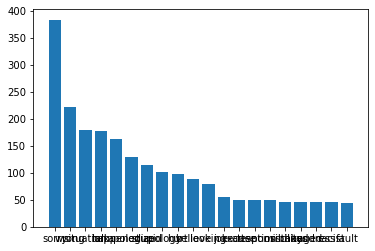

In [149]:
#w = collections.Counter(apology_words_count)
#plt.bar(w.keys(), w.values())

plt.bar(df[0], df[1])